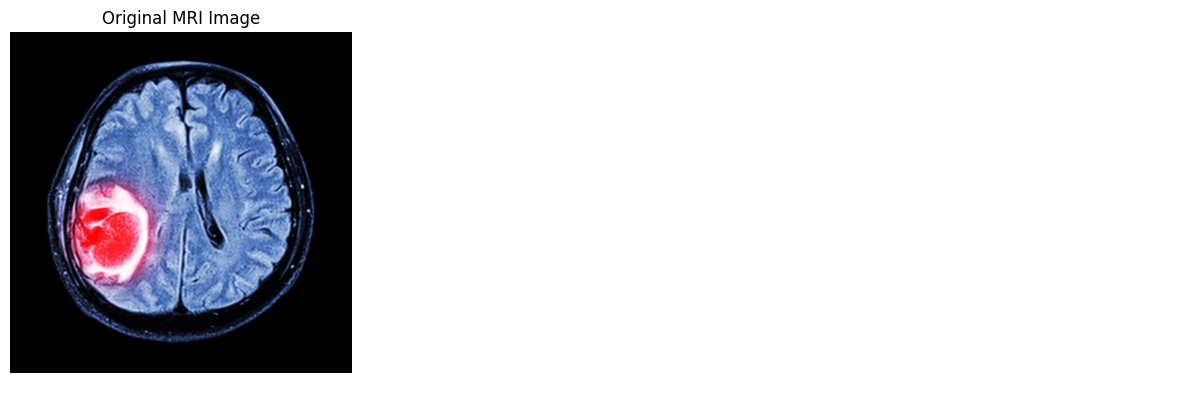

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the MRI image
mri_image = cv2.imread("/content/brain.jpg")  # Load MRI image in color

# Convert to grayscale for processing
gray_image = cv2.cvtColor(mri_image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Apply Otsu's thresholding for segmentation
_, thresholded = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Find contours of the segmented tumor region
contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a mask for the tumor region
tumor_mask = np.zeros_like(mri_image)
cv2.drawContours(tumor_mask, contours, -1, (0, 0, 255), -1)  # Fill tumor region with red color

# Apply the mask to change tumor color
segmented_image = cv2.addWeighted(mri_image, 0.7, tumor_mask, 0.3, 0)

# Display results using Matplotlib
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(cv2.cvtColor(mri_image, cv2.COLOR_BGR2RGB))
axes[0].set_title("Original MRI Image")

for ax in axes:
    ax.axis("off")

plt.show()

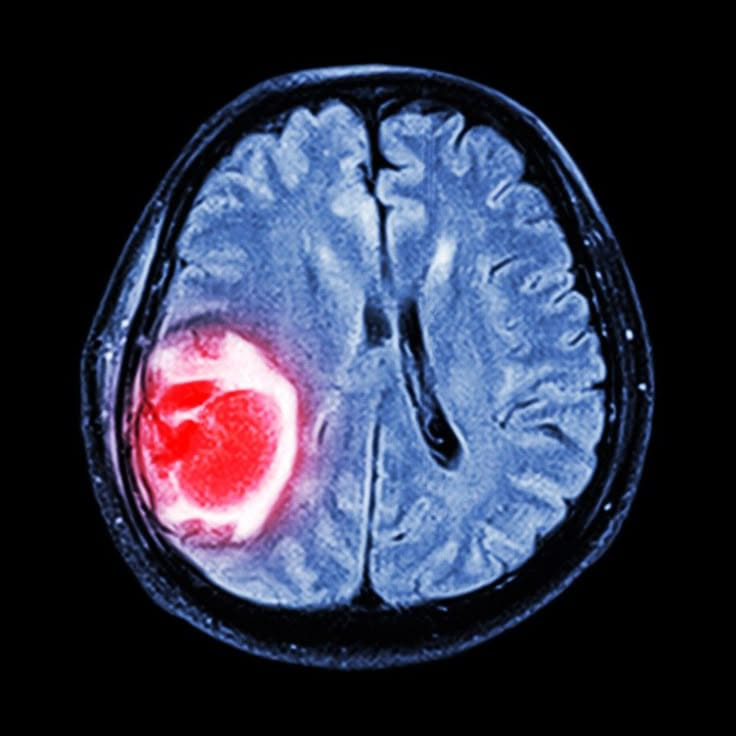

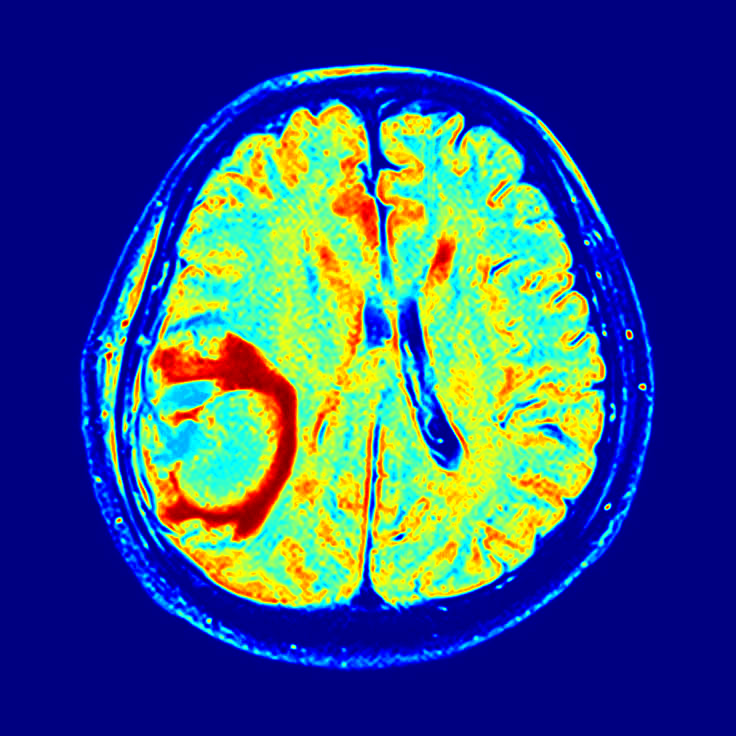

In [4]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow # Import the cv2_imshow function

def change_color(image_path, color_map=cv2.COLORMAP_JET):
    """Load an image and apply a color map transformation."""
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
    colored_image = cv2.applyColorMap(image, color_map)  # Apply color map
    return colored_image

def main(image_path):
    """Main function to process and display the color-changed image."""
    colored_image = change_color(image_path)

    # Display results using cv2_imshow instead of cv2.imshow
    cv2_imshow(cv2.imread(image_path))  # Display original image
    cv2_imshow(colored_image) # Display color changed image


# Example usage
image_path = "/content/brain.jpg"  # Replace with the actual MRI image path
main(image_path)

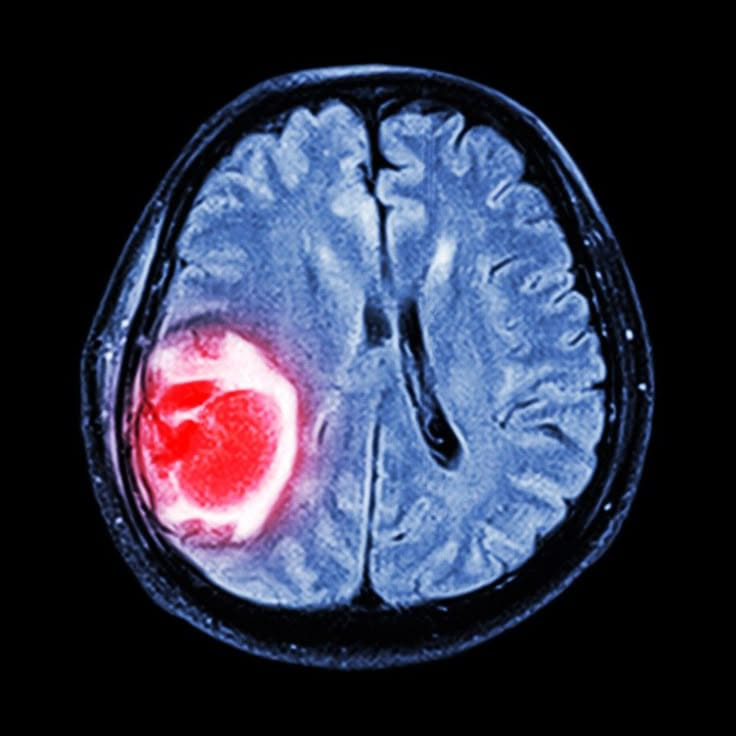

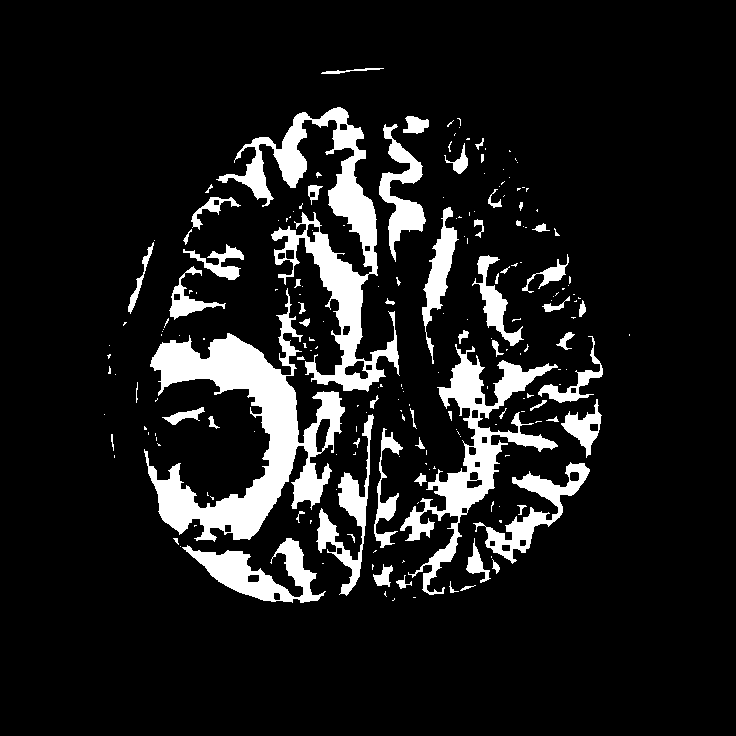

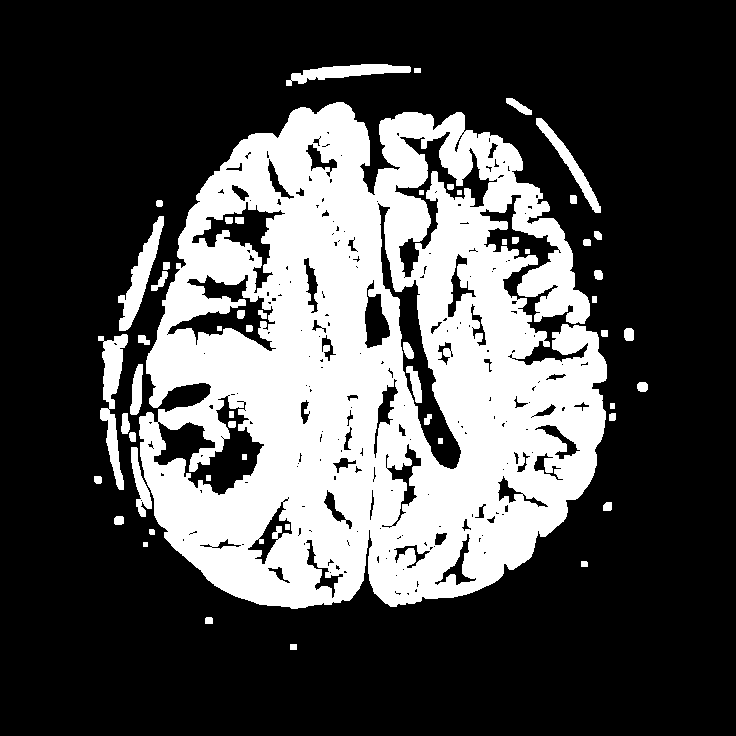

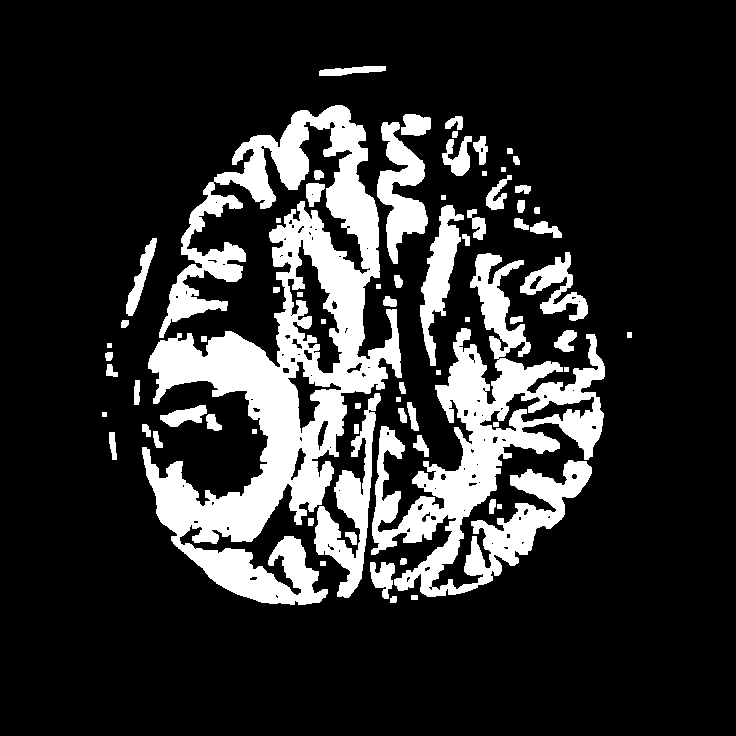

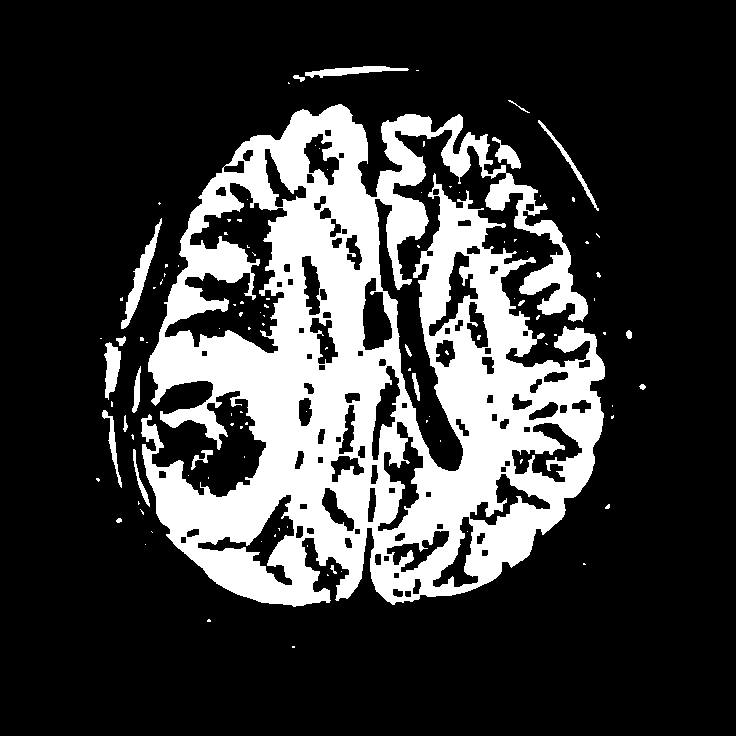

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Import cv2_imshow

def apply_morphological_operations(image_path):
    """Load an image and apply morphological operations."""
    image = cv2.imread("/content/brain.jpg", cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
    _, thresholded = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)  # Apply thresholding

    # Define a kernel for morphological operations
    kernel = np.ones((5, 5), np.uint8)

    # Apply morphological operations
    erosion = cv2.erode(thresholded, kernel, iterations=1)  # Erosion removes noise
    dilation = cv2.dilate(thresholded, kernel, iterations=1)  # Dilation enhances features
    opening = cv2.morphologyEx(thresholded, cv2.MORPH_OPEN, kernel)  # Opening removes small noise
    closing = cv2.morphologyEx(thresholded, cv2.MORPH_CLOSE, kernel)  # Closing fills gaps

    return erosion, dilation, opening, closing

def main(image_path):
    """Main function to process and display morphological operations."""
    erosion, dilation, opening, closing = apply_morphological_operations(image_path)

    # Display results using cv2_imshow instead of cv2.imshow
    cv2_imshow(cv2.imread("/content/brain.jpg"))  # Display original image
    cv2_imshow(erosion)
    cv2_imshow(dilation)
    cv2_imshow(opening)
    cv2_imshow(closing)

# Example usage
image_path = "/content/brain.jpg"  # Replace with the actual MRI image path
main(image_path)

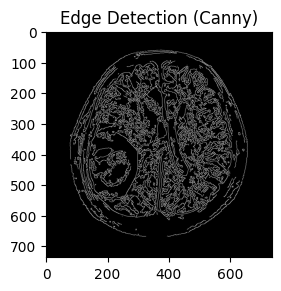

In [5]:
# Function to preprocess MRI image
def preprocess_image(image_path):
    image = cv2.imread("/content/brain.jpg", cv2.IMREAD_GRAYSCALE)  # Load in grayscale
    image = cv2.GaussianBlur(image, (5, 5), 0)  # Apply Gaussian blur to reduce noise
    image = cv2.equalizeHist(image)  # Enhance contrast
    return image

# Function to detect edges using Canny Edge Detection
def detect_edges(image_path):
    image = preprocess_image(image_path)

    # Apply Canny edge detection
    edges = cv2.Canny(image, threshold1=50, threshold2=150)

    return image, edges

# Function to visualize results
def visualize_results(image_path):
    original_image, edge_detected_image = detect_edges(image_path)

    # Import matplotlib.pyplot as plt
    import matplotlib.pyplot as plt

    plt.subplot(1, 2, 2)
    plt.title("Edge Detection (Canny)")
    plt.imshow(edge_detected_image, cmap="gray")

    plt.show()

# Example usage
image_path = "/content/brain.jpg"  # Replace with actual MRI image path
visualize_results(image_path)

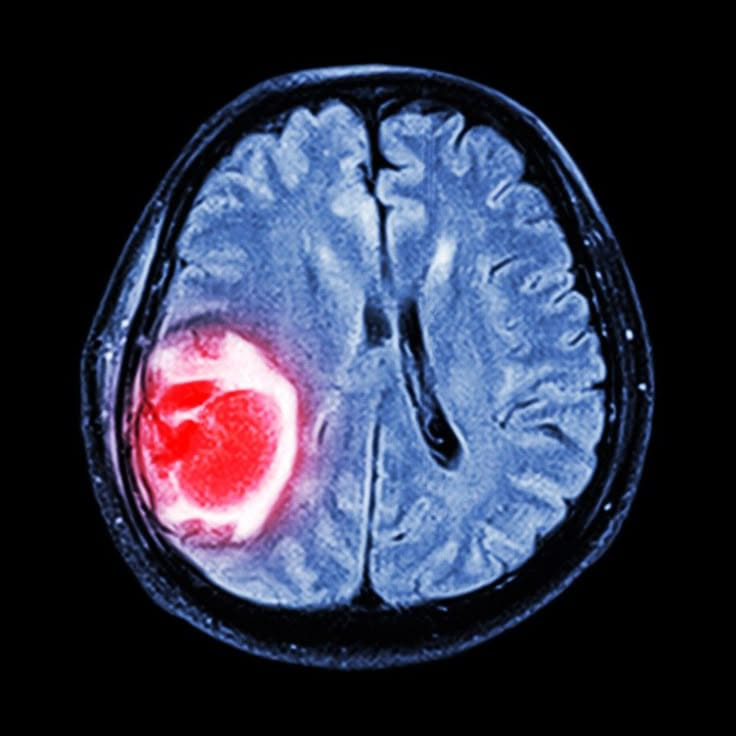

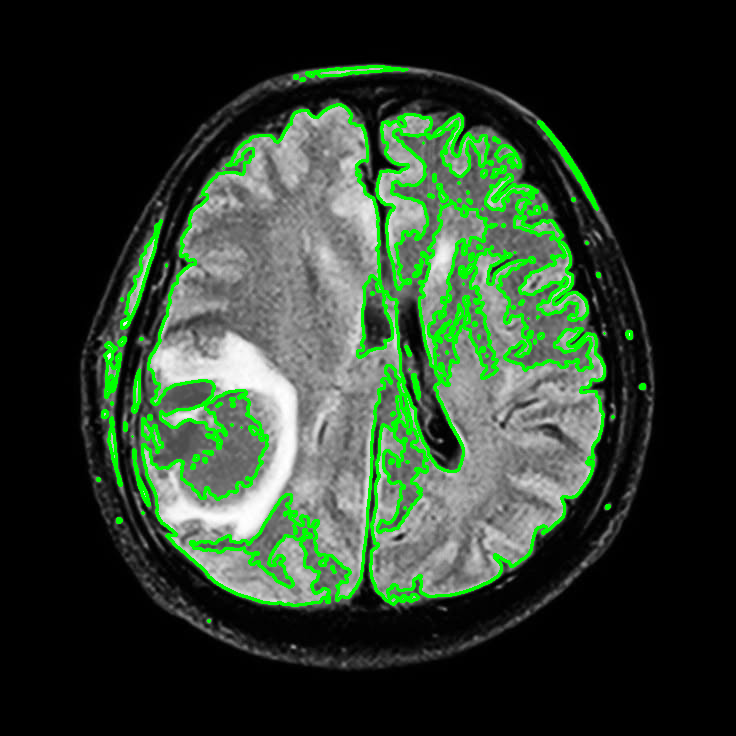

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Import cv2_imshow

def detect_contours(image_path):
    """Load an image and detect contours."""
    image = cv2.imread("/content/brain.jpg", cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
    blurred = cv2.GaussianBlur(image, (5, 5), 0)  # Apply Gaussian blur to reduce noise
    _, thresholded = cv2.threshold(blurred, 128, 255, cv2.THRESH_BINARY)  # Apply thresholding

    # Find contours
    contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours on the original image
    contour_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)  # Convert grayscale to BGR for color display
    cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)  # Draw contours in green

    return contour_image

def main(image_path):
    """Main function to process and display contour detection."""
    contour_image = detect_contours(image_path)

    # Display results using cv2_imshow instead of cv2.imshow
    cv2_imshow(cv2.imread("/content/brain.jpg"))  # Display original image
    cv2_imshow(contour_image)  # Display contour image

# Example usage
image_path = "brain_mri.jpg"  # Replace with the actual MRI image path
main(image_path)

Edge detection test passed successfully!


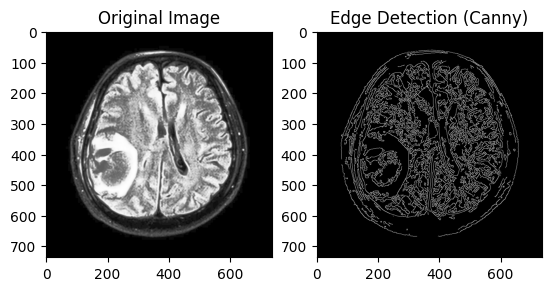

In [ ]:
# Function to preprocess MRI image
def preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load in grayscale
    image = cv2.GaussianBlur(image, (5, 5), 0)  # Apply Gaussian blur to reduce noise # This line was indented; Fixed indentation
    image = cv2.equalizeHist(image)  # Enhance contrast
    return image

# Function to detect edges using Canny Edge Detection
def detect_edges(image_path):
    image = preprocess_image(image_path)

    # Apply Canny edge detection
    edges = cv2.Canny(image, threshold1=50, threshold2=150)

    return image, edges

# Function to test edge detection
def test_edge_detection(image_path):
    original_image, edge_detected_image = detect_edges(image_path)

    # Check if the output is a valid image
    assert original_image is not None, "Error: Original image not loaded correctly."
    assert edge_detected_image is not None, "Error: Edge detection failed."

    # Check if the edge-detected image has the same dimensions as the original
    assert original_image.shape == edge_detected_image.shape, "Error: Image dimensions mismatch."

    print("Edge detection test passed successfully!")

    # Import matplotlib.pyplot before using plt
    import matplotlib.pyplot as plt

    plt.subplot(1, 2, 1) #added subplot for original image
    plt.title("Original Image")
    plt.imshow(original_image, cmap="gray")

    plt.subplot(1, 2, 2)
    plt.title("Edge Detection (Canny)")
    plt.imshow(edge_detected_image, cmap="gray")

    plt.show()

# Example usage
image_path = "/content/brain.jpg"
import cv2
test_edge_detection(image_path)

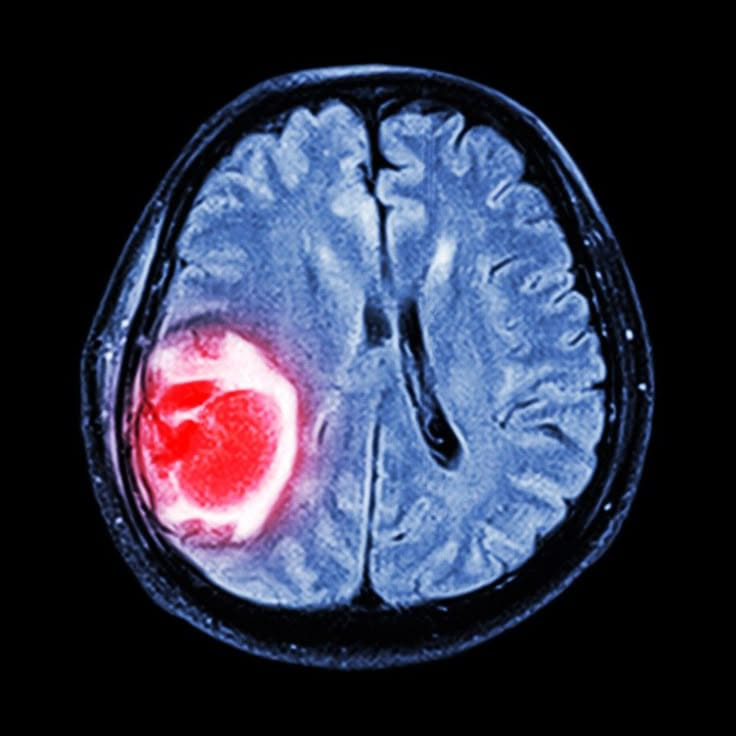

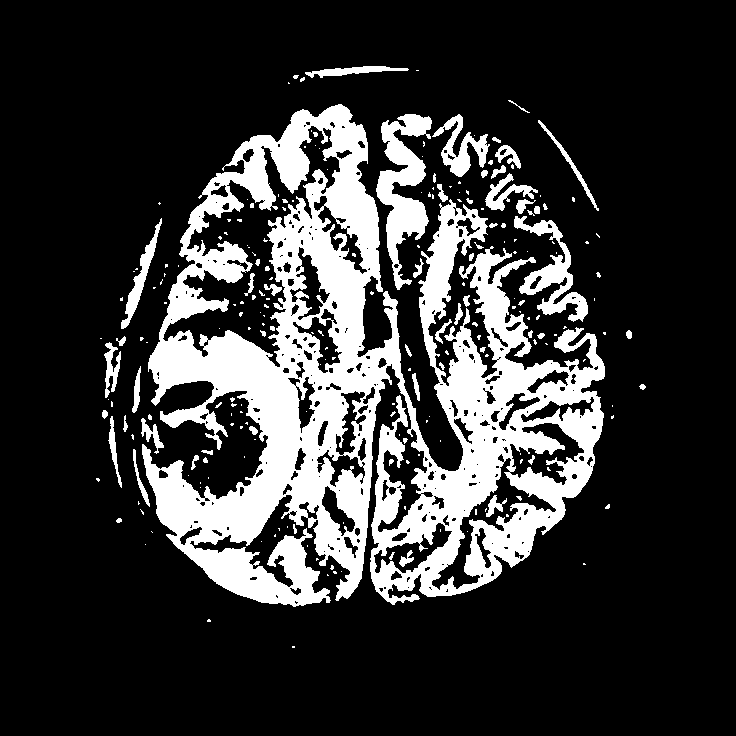

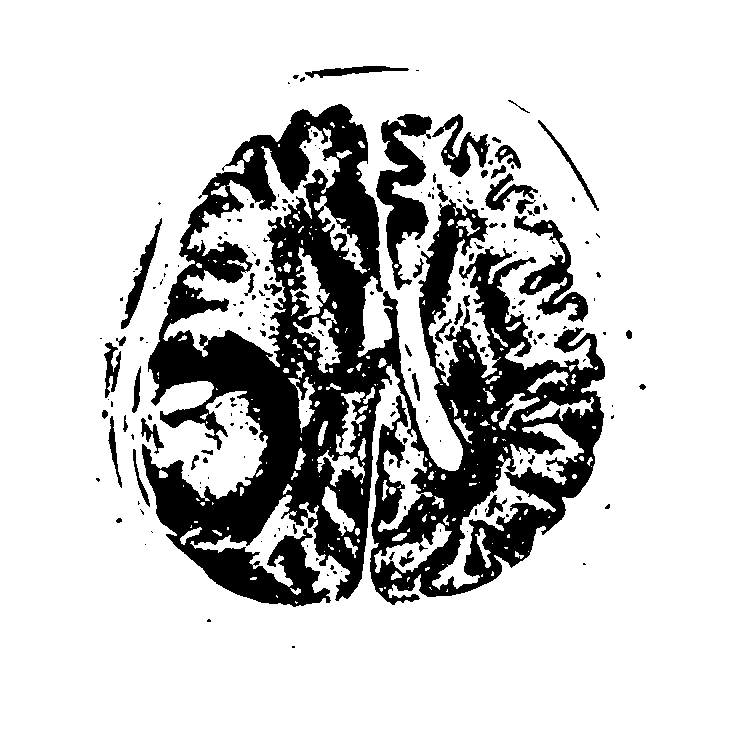

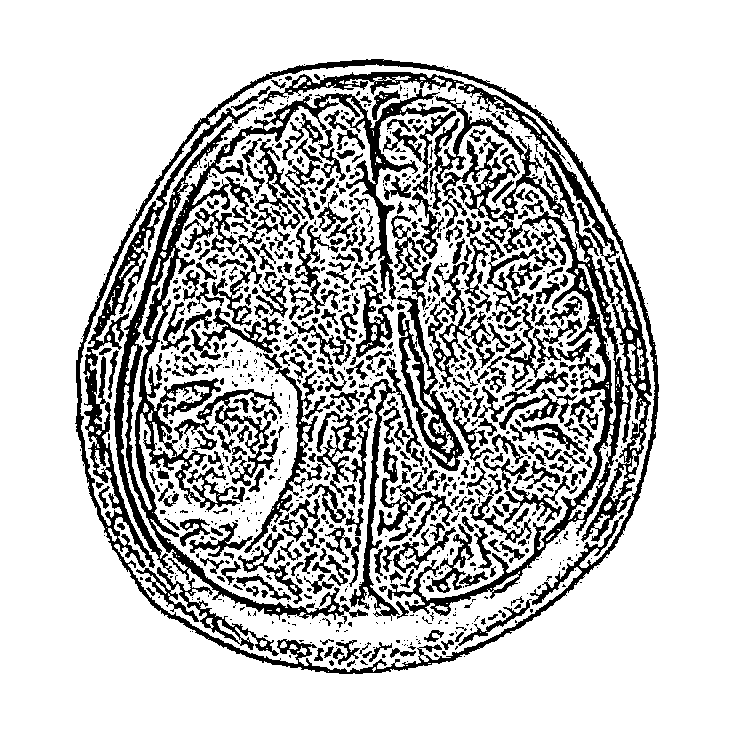

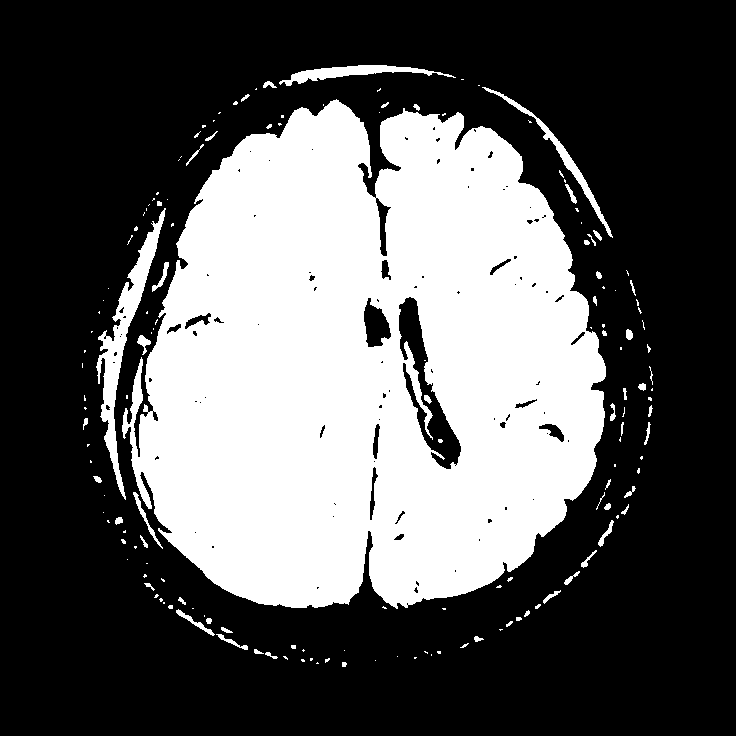

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Import cv2_imshow

# ... (rest of your code) ...

def main(image_path):
    """Main function to process and display thresholding results."""
    binary_thresh, binary_inv_thresh, adaptive_thresh, otsu_thresh = apply_threshold(image_path)

    # Display results using cv2_imshow instead of cv2.imshow
    cv2_imshow(cv2.imread(image_path))  # Display original image
    cv2_imshow(binary_thresh)
    cv2_imshow(binary_inv_thresh)
    cv2_imshow(adaptive_thresh)
    cv2_imshow(otsu_thresh)


# Example usage
image_path = "/content/brain.jpg"  # Replace with the actual MRI image path
main(image_path)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv2DTranspose, concatenate, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import numpy as np
import cv2

# Define U-Net model
def unet_model(input_size=(256, 256, 1)):
    inputs = Input(input_size)

    # Encoder
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    # Bottleneck
    conv4 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv4)

    # Decoder
    up5 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv4)
    merge5 = concatenate([up5, conv3])
    conv5 = Conv2D(256, (3, 3), activation='relu', padding='same')(merge5)
    conv5 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv5)

    up6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv5)
    merge6 = concatenate([up6, conv2])
    conv6 = Conv2D(128, (3, 3), activation='relu', padding='same')(merge6)
    conv6 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv6)

    up7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv6)
    merge7 = concatenate([up7, conv1])
    conv7 = Conv2D(64, (3, 3), activation='relu', padding='same')(merge7)
    conv7 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv7)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(conv7)

    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Generate synthetic tumor-like data
def generate_synthetic_data(num_samples=100, img_size=(256, 256)):
    images = []
    masks = []

    for _ in range(num_samples):
        img = np.random.rand(img_size[0], img_size[1]) * 255  # Random grayscale background
        mask = np.zeros((img_size[0], img_size[1]))  # Empty mask

        # Generate random tumor-like blobs
        for _ in range(np.random.randint(1, 5)):  # Random number of tumors
            center = (np.random.randint(50, 200), np.random.randint(50, 200))
            radius = np.random.randint(10, 40)
            cv2.circle(mask, center, radius, 255, -1)  # Draw tumor-like blobs

        img = img / 255.0  # Normalize
        mask = mask / 255.0  # Normalize

        images.append(np.expand_dims(img, axis=-1))
        masks.append(np.expand_dims(mask, axis=-1))

    return np.array(images), np.array(masks)

# Train model with synthetic tumor-like data
def train_model(epochs=10, batch_size=8):
    images, masks = generate_synthetic_data(num_samples=200)

    # Split dataset into training and validation sets
    split_idx = int(0.8 * len(images))
    X_train, X_val = images[:split_idx], images[split_idx:]
    y_train, y_val = masks[:split_idx], masks[split_idx:]

    model = unet_model()

    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=batch_size)

    model.save("synthetic_brain_tumor_segmentation_model.h5")
    print("Model training complete and saved!")

# Example usage
train_model()

Epoch 1/10
